# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd 
from shapely import wkt

from mpl_toolkits.basemap import Basemap

import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import shapely
from shapely.geometry import LineString
from descartes import PolygonPatch

from itertools import groupby

# Import Dataset

In [2]:
url_cable = "https://raw.githubusercontent.com/telegeography/www.submarinecablemap.com/master/web/public/api/v3/cable/cable-geo.json"
url_landing = "https://raw.githubusercontent.com/telegeography/www.submarinecablemap.com/master/web/public/api/v3/landing-point/landing-point-geo.json"

master_cable = gpd.read_file(url_cable)
master_landing = gpd.read_file(url_landing)

data_cable = gpd.read_file(url_cable)
data_landing = gpd.read_file(url_landing)

# Data Pre-processing

In [3]:
# convert geometry type to string type
data_cable['str_geom'] = data_cable.geometry.apply(lambda x: wkt.dumps(x))
data_landing['str_geom'] = data_landing.geometry.apply(lambda x: wkt.dumps(x))

# take only the number in string
data_cable['str_geom'] = [x.replace("MULTILINESTRING ","").replace("(","").replace(")","")
                          for x in data_cable['str_geom']]
data_landing['str_geom'] = [x.replace("POINT ","").replace("(","").replace(")","")
                          for x in data_landing['str_geom']]

# we take only column: id, name, str_geom
data_cable = data_cable[['id','name','str_geom']]
data_landing = data_landing[['id','name','str_geom']]

In [4]:
# split lat long in str_geom 
data_landing['str_geom'] = data_landing['str_geom'].tolist()
data_landing['str_geom'] = [x.split(' ') for x in data_landing['str_geom']]

# EDA

In [5]:
# indonesia data landing
data_landing_ind = data_landing[data_landing['name'].str.contains("Indonesia")]

dt_land_ind_lat = []
dt_land_ind_long = []
dt_land_ind_name = []

for i in range(0,len(data_landing_ind['str_geom'])):
    dt_land_ind_long.append(float(data_landing_ind['str_geom'].tolist()[i][0]))
    dt_land_ind_lat.append(float(data_landing_ind['str_geom'].tolist()[i][1]))
    
for i in range(0, len(data_landing_ind['name'])):
    dt_land_ind_name.append(data_landing_ind['name'].tolist()[i].replace(", Indonesia",""))

In [6]:
# choose cable in data_cable
cable_id = 'jasuka'
jasuka = data_cable.loc[data_cable['id']==cable_id]['str_geom'].tolist()[0].split(',')
jasuka = [x.lstrip() for x in jasuka]
jasuka = [x.split(' ') for x in jasuka]

jasuka_lat = []
jasuka_long = []

for i in range(0,len(jasuka)):
    jasuka_long.append(float(jasuka[i][0]))
    jasuka_lat.append(float(jasuka[i][1]))

In [7]:
def cable_coord(cable_id):
    cable = data_cable.loc[data_cable['id']==cable_id]['str_geom'].tolist()[0].split(',')
    cable = [x.lstrip() for x in cable]
    cable = [x.split(' ') for x in cable]

    cable_lat = []
    cable_long = []

    for i in range(0,len(cable)):
        cable_long.append(float(cable[i][0]))
        cable_lat.append(float(cable[i][1]))
    
    return cable_lat, cable_long

# Viz

In [8]:
triasmitra = ['b2js-jakarta-bangka-batam-singapore-cable-system','damai-cable-system','jakarta-surabaya-cable-system-jayabaya','java-bali-cable-system-jbcs']

xl = ['balok','batam-rengit-cable-system-brcs','batam-sarawak-internet-cable-system-basics','link-1-phase-1','link-1-phase-2','link-2-phase-1','ink-2-phase-2','link-3-phase-1','link-3-phase-2','link-4-phase-2','link-5-phase-2','pasuli','sjjk']

moratelindo = ['batam-dumai-melaka-bdm-cable-system','denpasar-waingapu-cable-systems','jakarta-bangka-bintan-batam-singapore-b3js','kupang-alor-cable-systems','moratelindo-international-cable-system-1-mic-1','sape-labuanbajo-ende-kupang-cable-systems','tanjun-pandan-sungai-kakap-cable-system']

telkom = ['batam-singapore-cable-system-bscs','bifrost','dumai-melaka-cable-system','indonesia-global-gateway-igg-system','jaka2ladema','jasuka','luwuk-tutuyan-cable-system-ltcs','mataram-kupang-cable-system-mkcs','s-u-b-cable-system','sea-us','smpcs-packet-1','smpcs-packet-2','sumatera-bangka-cable-system-sbcs','tarakan-selor-cable-system-tscs','thailand-indonesia-singapore-tis']

indosat = ['indigo-west','jakabare','java-kalimantan-sulawesi-jakasusi']

pgascom = ['pgascom']

palapa_east = ['palapa-ring-east']
palapa_middle = ['palapa-ring-middle']
palapa_west = ['palapa-ring-west']

In [9]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='upper left', mode = "expand", ncol = 10)

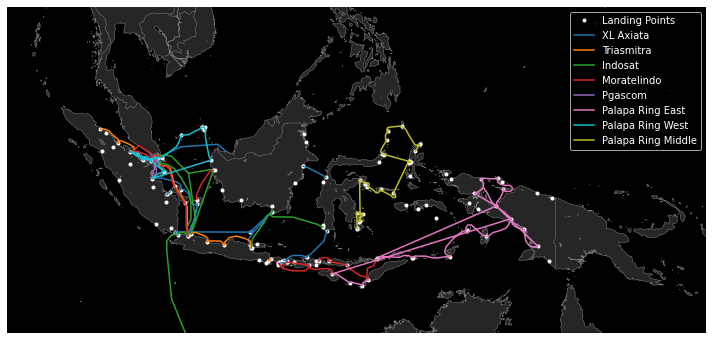

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd 
from shapely import wkt

from mpl_toolkits.basemap import Basemap

import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

url_cable = "https://raw.githubusercontent.com/telegeography/www.submarinecablemap.com/master/web/public/api/v3/cable/cable-geo.json"
url_landing = "https://raw.githubusercontent.com/telegeography/www.submarinecablemap.com/master/web/public/api/v3/landing-point/landing-point-geo.json"

master_cable = gpd.read_file(url_cable)
master_landing = gpd.read_file(url_landing)

data_cable = gpd.read_file(url_cable)
data_landing = gpd.read_file(url_landing)

# convert geometry type to string type
data_cable['str_geom'] = data_cable.geometry.apply(lambda x: wkt.dumps(x))
data_landing['str_geom'] = data_landing.geometry.apply(lambda x: wkt.dumps(x))

# take only the number in string
data_cable['str_geom'] = [x.replace("MULTILINESTRING ","").replace("(","").replace(")","")
                          for x in data_cable['str_geom']]
data_landing['str_geom'] = [x.replace("POINT ","").replace("(","").replace(")","")
                          for x in data_landing['str_geom']]

# we take only column: id, name, str_geom
data_cable = data_cable[['id','name','str_geom']]
data_landing = data_landing[['id','name','str_geom']]

# split lat long in str_geom 
data_landing['str_geom'] = data_landing['str_geom'].tolist()
data_landing['str_geom'] = [x.split(' ') for x in data_landing['str_geom']]

# indonesia data landing
data_landing_ind = data_landing[data_landing['name'].str.contains("Indonesia")]

dt_land_ind_lat = []
dt_land_ind_long = []
dt_land_ind_name = []

for i in range(0,len(data_landing_ind['str_geom'])):
    dt_land_ind_long.append(float(data_landing_ind['str_geom'].tolist()[i][0]))
    dt_land_ind_lat.append(float(data_landing_ind['str_geom'].tolist()[i][1]))
    
for i in range(0, len(data_landing_ind['name'])):
    dt_land_ind_name.append(data_landing_ind['name'].tolist()[i].replace(", Indonesia",""))
    
# choose cable in data_cable
cable_id = 'jasuka'
jasuka = data_cable.loc[data_cable['id']==cable_id]['str_geom'].tolist()[0].split(',')
jasuka = [x.lstrip() for x in jasuka]
jasuka = [x.split(' ') for x in jasuka]

jasuka_lat = []
jasuka_long = []

for i in range(0,len(jasuka)):
    jasuka_long.append(float(jasuka[i][0]))
    jasuka_lat.append(float(jasuka[i][1]))    

def cable_coord(cable_id):
    cable = data_cable.loc[data_cable['id']==cable_id]['str_geom'].tolist()[0].split(',')
    cable = [x.lstrip() for x in cable]
    cable = [x.split(' ') for x in cable]

    cable_lat = []
    cable_long = []

    for i in range(0,len(cable)):
        cable_long.append(float(cable[i][0]))
        cable_lat.append(float(cable[i][1]))
    
    return cable_lat, cable_long

triasmitra = ['b2js-jakarta-bangka-batam-singapore-cable-system','damai-cable-system','jakarta-surabaya-cable-system-jayabaya','java-bali-cable-system-jbcs']

xl = ['balok','batam-rengit-cable-system-brcs','batam-sarawak-internet-cable-system-basics','link-1-phase-1','link-1-phase-2','link-2-phase-1','ink-2-phase-2','link-3-phase-1','link-3-phase-2','link-4-phase-2','link-5-phase-2','pasuli','sjjk']

moratelindo = ['batam-dumai-melaka-bdm-cable-system','denpasar-waingapu-cable-systems','jakarta-bangka-bintan-batam-singapore-b3js','kupang-alor-cable-systems','moratelindo-international-cable-system-1-mic-1','sape-labuanbajo-ende-kupang-cable-systems','tanjun-pandan-sungai-kakap-cable-system']

telkom = ['batam-singapore-cable-system-bscs','bifrost','dumai-melaka-cable-system','indonesia-global-gateway-igg-system','jaka2ladema','jasuka','luwuk-tutuyan-cable-system-ltcs','mataram-kupang-cable-system-mkcs','s-u-b-cable-system','sea-us','smpcs-packet-1','smpcs-packet-2','sumatera-bangka-cable-system-sbcs','tarakan-selor-cable-system-tscs','thailand-indonesia-singapore-tis']

indosat = ['indigo-west','jakabare','java-kalimantan-sulawesi-jakasusi']

pgascom = ['pgascom']

palapa_east = ['palapa-ring-east']
palapa_middle = ['palapa-ring-middle']
palapa_west = ['palapa-ring-west']

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc='upper right')

fig, ax = plt.subplots(figsize=(10,5))
peta = Basemap(projection='merc', lat_0=0, lon_0=125,
           resolution='l', area_thresh=0.1,
           llcrnrlon=90, llcrnrlat=-15,
           urcrnrlon=155, urcrnrlat=15)

peta.drawmapboundary(fill_color='black')
peta.fillcontinents(color=[0.15,0.15,0.15],lake_color='black',zorder=1)
peta.drawcoastlines(linewidth=0.5,color=[0.5,0.5,0.5])
peta.drawcountries(linewidth=0.5,color=[0.5,0.5,0.5])

plt.style.use('dark_background')

a,b = peta(dt_land_ind_long, dt_land_ind_lat)
peta.plot(a,b,'o', markersize=3, color='white', label='Landing Points')
#-----------------------------------------------------------------------------------------
for i in xl:
    if(data_cable[data_cable['id']==i]['str_geom'].tolist()==[]):
        continue
    else:
        lat, long = cable_coord(i)
        x,y = peta(long, lat)
        peta.plot(x,y, label='XL Axiata', color='tab:blue')

for i in triasmitra:
    if(data_cable[data_cable['id']==i]['str_geom'].tolist()==[]):
        continue
    else:
        lat, long = cable_coord(i)
        x,y = peta(long, lat)
        peta.plot(x,y, label='Triasmitra', color='tab:orange')
        
for i in indosat:
    if(data_cable[data_cable['id']==i]['str_geom'].tolist()==[]):
        continue
    else:
        lat, long = cable_coord(i)
        x,y = peta(long, lat)
        peta.plot(x,y, label='Indosat',color='tab:green')
        
for i in moratelindo:
    if(data_cable[data_cable['id']==i]['str_geom'].tolist()==[]):
        continue
    else:
        lat, long = cable_coord(i)
        x,y = peta(long, lat)
        peta.plot(x,y, label='Moratelindo', color='tab:red')
        
for i in pgascom:
    if(data_cable[data_cable['id']==i]['str_geom'].tolist()==[]):
        continue
    else:
        lat, long = cable_coord(i)
        x,y = peta(long, lat)
        peta.plot(x,y, label='Pgascom',color='tab:purple')

for i in palapa_east:
    if(data_cable[data_cable['id']==i]['str_geom'].tolist()==[]):
        continue
    else:
        lat, long = cable_coord(i)
        x,y = peta(long, lat)
        peta.plot(x,y, label='Palapa Ring East',color='tab:pink')

for i in palapa_west:
    if(data_cable[data_cable['id']==i]['str_geom'].tolist()==[]):
        continue
    else:
        lat, long = cable_coord(i)
        x,y = peta(long, lat)
        peta.plot(x,y, label='Palapa Ring West',color='tab:cyan')

for i in palapa_middle:
    if(data_cable[data_cable['id']==i]['str_geom'].tolist()==[]):
        continue
    else:
        lat, long = cable_coord(i)
        x,y = peta(long, lat)
        peta.plot(x,y, label='Palapa Ring Middle',color='tab:olive')
#-----------------------------------------------------------------------------------------
legend_without_duplicate_labels(ax)

plt.box(False)

plt.tight_layout()
plt.show()

In [11]:
for multiline in master_cable[master_cable['id']=='jasuka'].geometry:
    for line in multiline:
        print(line)

LINESTRING (101.4500023678063 0.533330507769705, 101.250002509488 0.118588418888407, 100.8000028282721 -0.556402272850676, 100.3616231388245 -0.943868049760795, 100.2375032267521 -0.556402272850676, 99.00000410340803 1.468426767332062, 98.78662425456835 1.747806214969586, 98.66250434249608 2.367912558705314, 98.66250434249608 3.266814816815753, 98.67598433294691 3.752031394331624)
LINESTRING (104.1750004373922 -2.580536704984041, 104.8499999592161 -2.018492325403201, 105.0749997998242 -1.849838648212568, 105.3671326755654 -1.810228623655547, 106.1630890290114 -2.00716932420525, 107.437908125918 -2.517708985005584, 107.6628879665399 -2.767442755874555)
LINESTRING (101.4476623694642 1.665522797277134, 101.3063524695692 2.143087178471944, 101.1937525493361 2.367912558705314, 101.250002509488 2.817450442654064, 101.4367223772141 3.009291944776294)
LINESTRING (98.67598433294691 3.752031394331624, 99.00000410340803 3.545571022727103, 99.20820395591741 3.380583027720917, 99.4500037846241 3.04

<AxesSubplot:>

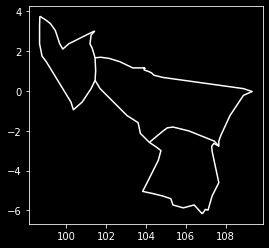

In [12]:
master_cable[master_cable['id']=='jasuka'].geometry.plot()

In [13]:
data_cable[master_cable['id']=='jasuka'].str_geom

463    101.4500023678063201 0.5333305077697050, 101.2...
Name: str_geom, dtype: object

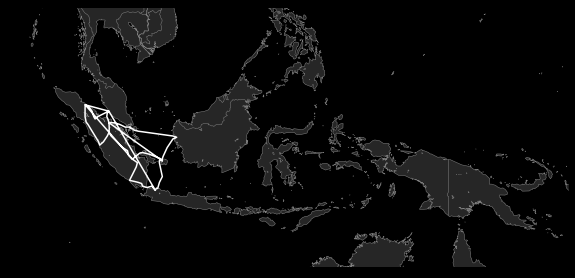

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
peta = Basemap(projection='merc', lat_0=0, lon_0=125,
           resolution='l', area_thresh=0.1,
           llcrnrlon=90, llcrnrlat=-15,
           urcrnrlon=155, urcrnrlat=15)

peta.drawmapboundary(fill_color='black')
peta.fillcontinents(color=[0.15,0.15,0.15],lake_color='black',zorder=1)
peta.drawcoastlines(linewidth=0.5,color=[0.5,0.5,0.5])
peta.drawcountries(linewidth=0.5,color=[0.5,0.5,0.5])

plt.style.use('dark_background')

a,b = peta(jasuka_long, jasuka_lat)
peta.plot(a,b,'-', markersize=3, color='white', label='Landing Points')

In [15]:
for multiline in master_cable[master_cable['id']=='jasuka'].geometry:
    for line in multiline:
        print(line)

LINESTRING (101.4500023678063 0.533330507769705, 101.250002509488 0.118588418888407, 100.8000028282721 -0.556402272850676, 100.3616231388245 -0.943868049760795, 100.2375032267521 -0.556402272850676, 99.00000410340803 1.468426767332062, 98.78662425456835 1.747806214969586, 98.66250434249608 2.367912558705314, 98.66250434249608 3.266814816815753, 98.67598433294691 3.752031394331624)
LINESTRING (104.1750004373922 -2.580536704984041, 104.8499999592161 -2.018492325403201, 105.0749997998242 -1.849838648212568, 105.3671326755654 -1.810228623655547, 106.1630890290114 -2.00716932420525, 107.437908125918 -2.517708985005584, 107.6628879665399 -2.767442755874555)
LINESTRING (101.4476623694642 1.665522797277134, 101.3063524695692 2.143087178471944, 101.1937525493361 2.367912558705314, 101.250002509488 2.817450442654064, 101.4367223772141 3.009291944776294)
LINESTRING (98.67598433294691 3.752031394331624, 99.00000410340803 3.545571022727103, 99.20820395591741 3.380583027720917, 99.4500037846241 3.04

In [16]:
cable_id = 'jasuka'

dt_cable = master_cable[master_cable['id']==cable_id].geometry.apply(lambda x: wkt.dumps(x)) # convert to str
dt_cable = [x.replace("MULTILINESTRING ","") for x in dt_cable] # remove multiline
dt_cable_list = dt_cable[0].split(')') # split by ) and conver to list
dt_cable_list = [i for i in dt_cable_list if i != ""] # remove missing vals
dt_cable_list = [x.replace("(","").replace(")","") for x in dt_cable_list] # remove ( and )
dt_cable_list = [x.split(',') for x in dt_cable_list]

dt_cable_list_new = []
for i in dt_cable_list:
    for j in i:
        dt_cable_list_new.append(j.lstrip())
        
dt_cable_list_new = [list(group) for k, group in groupby(dt_cable_list_new, lambda x: x == "") if not k]

dt_cable_list_final = []
for l in dt_cable_list_new:
    dt_cable_list_final.append([x.split(' ') for x in l])

In [17]:
dt_cable_list_final[0][0][1]

'0.5333305077697050'